In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dm
from skimage import io, transform
import os
import cv2
import torch
from matplotlib import cm


# Change it to the directory that you put the image file in.
# path_to_image_folder = '../0QIU/images/'
path_to_image_folder = './images_dcm/'

image_file_names = os.listdir(path_to_image_folder)
image_file_paths = []
for i, f in enumerate(image_file_names):
    image_file_paths.append(os.path.join(path_to_image_folder + f))
print(image_file_paths[1])
df = pd.read_csv('label.csv')
df.head()

./images_dcm/ID_fc9c6a4b0.dcm


,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,6d317b3d6,1,0,0,0,0,1
1,ab3c1fad5,1,0,0,0,0,1
2,df8281674,1,0,0,0,1,0
3,ed3db322c,1,0,1,0,0,0
4,39a1e36d9,1,0,1,0,0,0


In [2]:
images = []
for f in image_file_paths:
    image = dm.dcmread(f)
    arr_hu = float(image.RescaleSlope) * image.pixel_array + float(image.RescaleIntercept)

    v_min = 80 - 0.5 * 200
    v_max = 80 + 0.5 * 200
    
    arr_hu_win = arr_hu.copy()

#     Make the image array from 0 - 1
    arr_hu_win[arr_hu < v_min] = v_min
    arr_hu_win[arr_hu > v_max] = v_max
    arr_hu_win = (arr_hu_win - v_min) / (v_max - v_min)
    
    images.append(transform.resize(arr_hu_win, (256, 256)))

# dm.read_file(image_file_paths[0]).SeriesInstanceUID[3:] in df['ID']

In [3]:
import skimage

In [10]:
image_file_names[0][3:-4]

'2393dec98'

In [6]:
image_file_paths

['./images_dcm/ID_2393dec98.dcm',
 './images_dcm/ID_fc9c6a4b0.dcm',
 './images_dcm/ID_ebbb9f664.dcm',
 './images_dcm/ID_254206f97.dcm',
 './images_dcm/ID_c0a27d21b.dcm',
 './images_dcm/ID_ab60e2db8.dcm',
 './images_dcm/ID_d70ef0c4a.dcm',
 './images_dcm/ID_02033e6df.dcm',
 './images_dcm/ID_adcc347b9.dcm',
 './images_dcm/ID_fa27fd83b.dcm',
 './images_dcm/ID_0b6e3a1b6.dcm',
 './images_dcm/ID_b8377ab3a.dcm',
 './images_dcm/ID_057806dce.dcm',
 './images_dcm/ID_237549980.dcm',
 './images_dcm/ID_b549f4f52.dcm',
 './images_dcm/ID_b3d2df2ef.dcm',
 './images_dcm/ID_8df216590.dcm',
 './images_dcm/ID_1a2f016ef.dcm',
 './images_dcm/ID_fc0726f56.dcm',
 './images_dcm/ID_ac9767d9b.dcm',
 './images_dcm/ID_ac12f003d.dcm',
 './images_dcm/ID_5a93075b9.dcm',
 './images_dcm/ID_6557629af.dcm',
 './images_dcm/ID_944b4fde3.dcm',
 './images_dcm/ID_f79885999.dcm',
 './images_dcm/ID_ae878af30.dcm',
 './images_dcm/ID_c2821dbcc.dcm',
 './images_dcm/ID_da41e2871.dcm',
 './images_dcm/ID_87593c024.dcm',
 './images_dcm

In [11]:
for i, image in enumerate(images):
    image = torch.clamp(torch.tensor(image) * 0.315 + 0.188, 0, 1)
    skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))

<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/cc307a652.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/e2593d158.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/e176307c6.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/1cc59bd3a.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/69775ce36.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np

<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/5266ceecb.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/d3ce34e59.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/59b8afe55.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/fb39b136d.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/274abccfb.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np

<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/c5c43ede3.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/c37bfed79.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/fc490b490.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/a538f1173.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np.around(image.numpy()*255).astype(np.uint8))
<ipython-input-11-533c8f060ac7>:3: UserWarning: images_nw/3b4c3acc9.png is a low contrast image
  skimage.io.imsave(f'images_nw/{image_file_names[i][3:-4]}.png', np

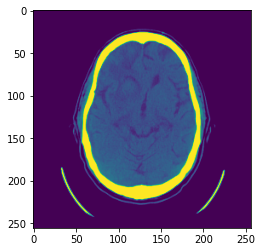

In [17]:
plt.imshow(plt.imread('images_nw/'+image_file_names[0][3:-4]+'.png'))

In [26]:
a = np.load('data.npy', allow_pickle=True).item()

array([1, 0, 1, 0, 0, 0], dtype=object)

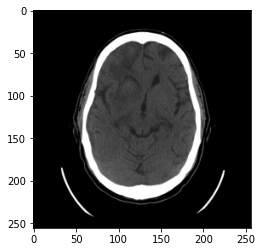

In [182]:
# plt.imshow(plt.imread('1.png'), cmap='gray')


In [96]:
# cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)

In [24]:
# Window Width
np.unique(windows[:,1])

array([  70.,   71.,   72.,   80.,   81.,   83.,   85.,   90.,   95.,
        100.,  107.,  110.,  120.,  135.,  150.,  300.,  400.,  600.,
       2500., 4000.])

In [23]:
images[:,0]

array([30., 40., 40., ..., 40., 40., 36.])

In [147]:
for i, image in enumerate(images):
    plt.imsave(os.path.join('images_nw', image_file_names[i][:-4] + '.jpg'), image)

In [148]:
images[0].shape

(256, 256)

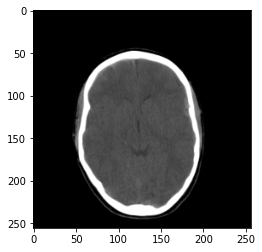

In [115]:
b = plt.imshow(images[1000],cmap='gray')

In [10]:
a = pd.read_csv('label.csv')

In [11]:
a[a['ID'] == "fc9c6a4b0"]

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
217,fc9c6a4b0,1,0,1,1,0,0


In [24]:
from PIL import Image

In [25]:
a = Image.open('images/fc9c6a4b0.png')

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [110]:
images[0].shape

(256, 256)

In [38]:
Image.fromarray(images[1])

OSError: cannot write mode F as PNG

<PIL.Image.Image image mode=F size=256x256 at 0x7F8F670E9A00>

In [62]:
images[1].shape

(512, 1024)

In [66]:
def transform(dir):
    trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.188], [0.315], inplace=True)
    ])
    return trans(
#         Image.open(dir)
        dir
        # One, a single image. Three, 3 channels. -1 keeps original.
        # (1,3,256.256)
    ).expand(1, 3, 256, 256) 

In [63]:
import torch
from PIL import Image
from torchvision import transforms

In [68]:
transform(images[1])

RuntimeError: The expanded size of the tensor (256) must match the existing size (512) at non-singleton dimension 3.  Target sizes: [1, 3, 256, 256].  Tensor sizes: [1, 512, 512]